In [1]:
import numbers
import array
from collections.abc import Iterable

import numpy as np
from scipy import linalg
from sklearn import utils
import scipy.sparse as sp

from sklearn.utils.validation import check_random_state, check_is_fitted

In [2]:
def create_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
):

    generator = check_random_state(random_state)

    if isinstance(n_samples, numbers.Integral):
        # Set n_centers by looking at centers arg
        if centers is None:
            centers = 3

        if isinstance(centers, numbers.Integral):
            n_centers = centers
            centers = generator.uniform(
                center_box[0], center_box[1], size=(n_centers, n_features)
            )

        else:
            centers = check_array(centers)
            n_features = centers.shape[1]
            n_centers = centers.shape[0]

    else:
        # Set n_centers by looking at [n_samples] arg
        n_centers = len(n_samples)
        if centers is None:
            centers = generator.uniform(
                center_box[0], center_box[1], size=(n_centers, n_features)
            )
        try:
            assert len(centers) == n_centers
        except TypeError as e:
            raise ValueError(
                "Parameter `centers` must be array-like. Got {!r} instead".format(
                    centers
                )
            ) from e
        except AssertionError as e:
            raise ValueError(
                "Length of `n_samples` not consistent with number of "
                f"centers. Got n_samples = {n_samples} and centers = {centers}"
            ) from e
        else:
            centers = check_array(centers)
            n_features = centers.shape[1]

    # stds: if cluster_std is given as list, it must be consistent
    # with the n_centers
    if hasattr(cluster_std, "__len__") and len(cluster_std) != n_centers:
        raise ValueError(
            "Length of `clusters_std` not consistent with "
            "number of centers. Got centers = {} "
            "and cluster_std = {}".format(centers, cluster_std)
        )

    if isinstance(cluster_std, numbers.Real):
        cluster_std = np.full(len(centers), cluster_std)

    X = []
    y = []

    if isinstance(n_samples, Iterable):
        n_samples_per_center = n_samples
    else:
        n_samples_per_center = [int(n_samples // n_centers)] * n_centers

        for i in range(n_samples % n_centers):
            n_samples_per_center[i] += 1

    for i, (n, std) in enumerate(zip(n_samples_per_center, cluster_std)):
        X.append(generator.normal(loc=centers[i], scale=std, size=(n, n_features)))
        y += [i] * n

    X = np.concatenate(X)
    y = np.array(y)
    
    if shuffle:
        total_n_samples = np.sum(n_samples)
        indices = np.arange(total_n_samples)
        generator.shuffle(indices)
        X = X[indices]
        y = y[indices]

    if return_centers:
        return X, y, centers
    else:
        return X, y


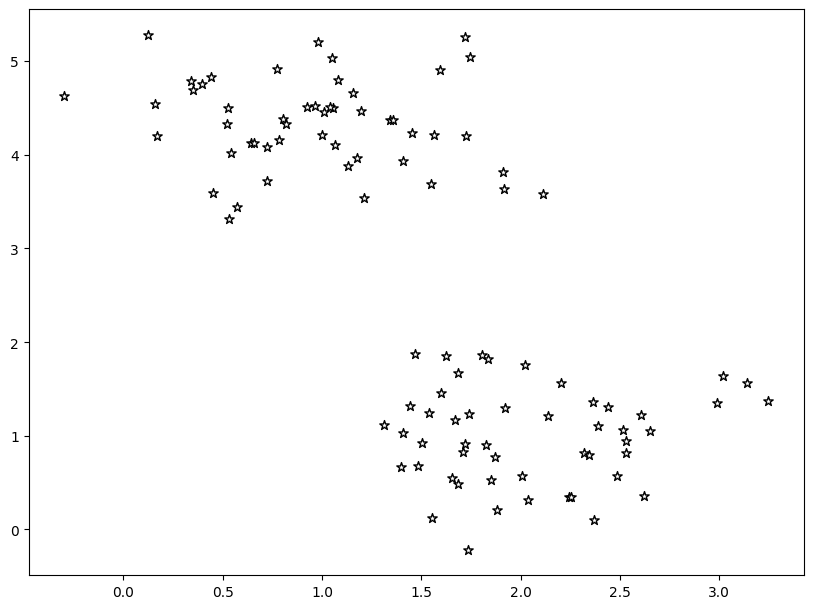

In [16]:
import matplotlib.pyplot as plt

X, y = create_blobs(
   n_samples=100, n_features=2,
   centers=2, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='*',
   edgecolor='black', s=50
)
plt.show()

In [17]:
X, y = create_blobs (n_samples=100, centers=2, random_state=101)
m=X.shape[0]
n=X.shape[1] 
n_iter=50
K=2
import random
import numpy as np

Centroid Calculation

In [18]:
centroids=np.array([]).reshape(n,0)
for k in range(K):
    centroids=np.c_[centroids,X[random.randint(0,m-1)]]
    output={}

Euclidean Distance Calculation

In [19]:
euclid=np.array([]).reshape(m,0)
for k in range(K):
       dist=np.sum((X-centroids[:,k])**2,axis=1)
       euclid=np.c_[euclid,dist]
minimum=np.argmin(euclid,axis=1)+1

Assigning Clusters and calculating mean

In [20]:
cent={}
for k in range(K):
    cent[k+1]=np.array([]).reshape(2,0)

for k in range(m):
    cent[minimum[k]]=np.c_[cent[minimum[k]],X[k]]
for k in range(K):
    cent[k+1]=cent[k+1].T


for k in range(K):
     centroids[:,k]=np.mean(cent[k+1],axis=0)

Calculating new centers

In [21]:
for i in range(n_iter):
      euclid=np.array([]).reshape(m,0)
      for k in range(K):
          dist=np.sum((X-centroids[:,k])**2,axis=1)
          euclid=np.c_[euclid,dist]
      C=np.argmin(euclid,axis=1)+1
      cent={}
      for k in range(K):
           cent[k+1]=np.array([]).reshape(2,0)
      for k in range(m):
           cent[C[k]]=np.c_[cent[C[k]],X[k]]
      for k in range(K):
           cent[k+1]=cent[k+1].T
      for k in range(K):
           centroids[:,k]=np.mean(cent[k+1],axis=0)
      final=cent

Text(0.5, 1.0, 'Original Dataset')

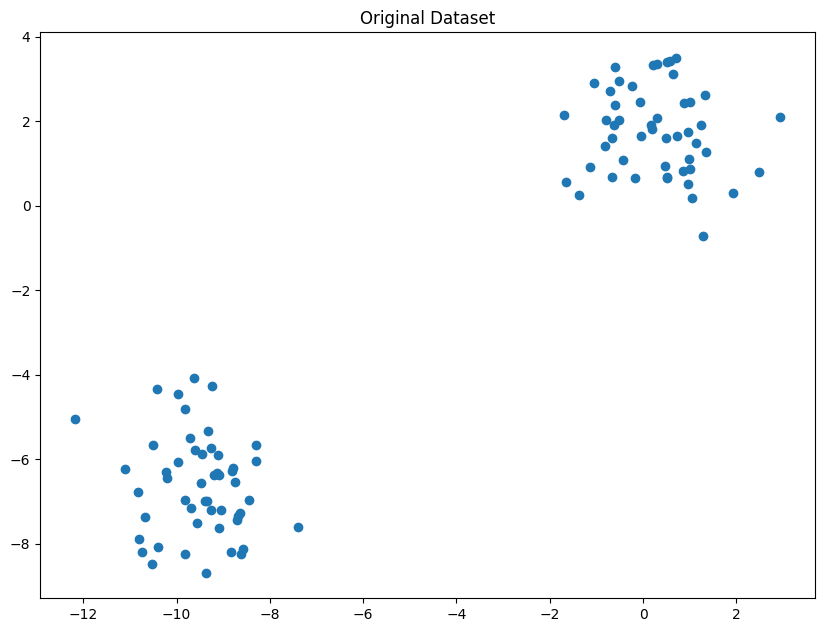

In [22]:
plt.scatter(X[:,0],X[:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Original Dataset')